In [ ]:
from google.colab import drive

drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
folder_path = "/content/drive/MyDrive/Dataset_Scene_Recognition/archive/15-scene/15-Scene/"

In [ ]:
!ls "/content/drive/MyDrive/Dataset_Scene_Recognition/archive/15-scene/15-Scene/"

00  01	02  03	04  05	06  07	08  09	10  11	12  13	14


In [ ]:
import glob
from PIL import Image 
from numpy import asarray 
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras
import keras.utils
import sklearn
from sklearn.model_selection import cross_validate
import sklearn.metrics
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras import utils as np_utils
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Activation, MaxPool2D, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD

In [ ]:
one_hot_lookup = np.eye(15) # 15 classes

dataset_x = []
dataset_y = []

for category in sorted(os.listdir(folder_path)):
    print('loading category: '+str(int(category)))
    for fname in os.listdir(folder_path+category):
        img = cv2.imread(folder_path+category+'/'+fname, 2)
        img = cv2.resize(img, (224,224))
        dataset_x.append(np.reshape(img, [224,224,1]))
        dataset_y.append(np.reshape(one_hot_lookup[int(category)], [15]))

dataset_x = np.array(dataset_x)
dataset_y = np.array(dataset_y)

loading category: 0
loading category: 1
loading category: 2
loading category: 3
loading category: 4
loading category: 5
loading category: 6
loading category: 7
loading category: 8
loading category: 9
loading category: 10
loading category: 11
loading category: 12
loading category: 13
loading category: 14


In [ ]:
dataset_x.shape

(4485, 224, 224, 1)

Splitting into training and test data sets

In [ ]:
p = np.random.permutation(len(dataset_x))
dataset_x = dataset_x[p]
dataset_y = dataset_y[p]
        
X_test = dataset_x[:int(len(dataset_x)/10)]
Y_test = dataset_y[:int(len(dataset_x)/10)]
X_train = dataset_x[int(len(dataset_x)/10):]
Y_train = dataset_y[int(len(dataset_x)/10):]

In [ ]:
print("X_Train Shape = ",X_train.shape)
print("X_Test Shape = ",X_test.shape)
print("Y_train Shape = ",Y_train.shape)
print("Y_Test Shape = ",Y_test.shape)



X_Train Shape =  (4037, 224, 224, 1)
X_Test Shape =  (448, 224, 224, 1)
Y_train Shape =  (4037, 15)
Y_Test Shape =  (448, 15)


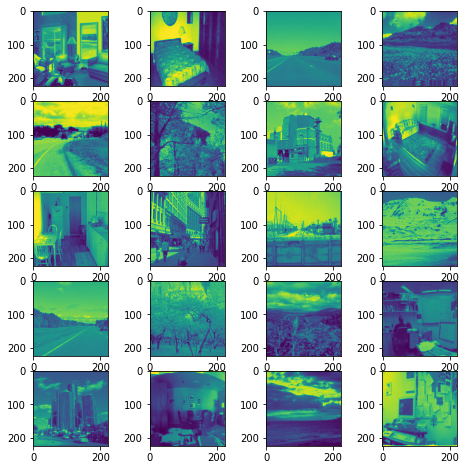

In [ ]:
X_train = X_train.reshape(len(X_train),224,224)
#X_train.reshape(len(X_train),(224,224))
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(1000, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[i])
    #print(Y[i])
plt.show()

In [ ]:
#X_train = X_train.reshape(len(X_train),50176)
#X_train.shape

(4037, 50176)

In [ ]:
Y_label = []
#Y_train[0] = np.argwhere(Y_train[0])
#print(Y_train[0])
for i in range(len(Y_train)):
  for j in range(len(Y_train[0])):
    if(Y_train[i][j]) == 1:
      Y_label.append(j)
print(Y_label[0])

    

10


In [ ]:
X_train = X_train.reshape(len(X_train),224,224)

In [ ]:
"""Y_label = np.array(Y_label)
model = keras.models.Sequential([tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(1024, activation = tf.nn.relu),
                                tf.keras.layers.Dropout(0.5),
                                #model.add(Dropout(0.25))
                                tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                tf.keras.layers.Dropout(0.5),
                                #model.add(Dropout(0.5))
    #model.add(Dense(512, activation = "relu"))
    #model.add(Dropout(0.5))
                                #tf.keras.layers.Dense(1024, activation = tf.nn.relu),
                                #tf.keras.layers.Dense(1024, activation = tf.nn.relu),
                                 
                                tf.keras.layers.Dense(7, activation = tf.nn.softmax)])
#])


with tf.device("GPU:0"):
    #callbacks = Callback()
    model.compile(optimizer= tf.optimizers.Adam(lr=1, decay=1e-6),
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
    model.fit(X_train, Y_label, epochs = 500)
    """


Epoch 1/500
127/127 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.0500
Epoch 2/500
127/127 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.0517
Epoch 3/500
127/127 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.0437
Epoch 4/500
127/127 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.0443
Epoch 5/500
127/127 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.0506
Epoch 6/500
127/127 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.0516
Epoch 7/500
127/127 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.0497
Epoch 8/500
127/127 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.0525
Epoch 9/500
127/127 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.0543
Epoch 10/500
127/127 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.0477
Epoch 11/500
127/12

KeyboardInterrupt: ignored

In [ ]:
def kerasCustom(a,b,c,d):
    batch_size = 128
    num_classes = 15
    epochs = 100
    img_rows, img_cols = X_train.shape[1],X_train.shape[2]
    input_shape = (img_rows, img_cols, 1)
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu', input_shape = input_shape))
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1024, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation = "relu"))
    model.add(Dropout(0.5))
    #model.add(Flatten())
    model.add(Dense(15, activation = "softmax"))
    # Define the optimizer
    optimizer = Adam(lr=0.0005, decay=1e-6)
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
    datagen.fit(a)
    history = model.fit_generator(datagen.flow(a,b, batch_size=64),steps_per_epoch=len(a) / 64, epochs=epochs)
    score = model.evaluate(c,d, verbose=1)
    print('\nAccuracy:', score[1])
    predictor = model.predict(c)
    return predictor
  
    
    
kerasCustom(X_train, Y_train, X_test, Y_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
63/63 [==============================] - 16s 244ms/step - loss: 5.4294 - accuracy: 0.1224
Epoch 2/100
63/63 [==============================] - 16s 245ms/step - loss: 2.6713 - accuracy: 0.1919
Epoch 3/100
63/63 [==============================] - 16s 245ms/step - loss: 2.2113 - accuracy: 0.3033
Epoch 4/100
63/63 [==============================] - 15s 244ms/step - loss: 2.0225 - accuracy: 0.3623
Epoch 5/100
63/63 [==============================] - 15s 244ms/step - loss: 1.8597 - accuracy: 0.4086
Epoch 6/100
63/63 [==============================] - 16s 245ms/step - loss: 1.7479 - accuracy: 0.4324
Epoch 7/100
63/63 [==============================] - 15s 244ms/step - loss: 1.7656 - accuracy: 0.4479
Epoch 8/100
63/63 [==============================] - 15s 243ms/step - loss: 1.6107 - accuracy: 0.4754
Epoch 9/100
63/63 [==============================] - 15s 243ms/step - loss: 1.4623 - accuracy: 0.5213
Epoch 10/100
63/63 [==============================] - 15s 244ms/step - loss: 1.368

array([[1.04091953e-07, 3.47214986e-08, 2.64632399e-04, ...,
        1.47715966e-07, 8.54770633e-07, 7.70349925e-06],
       [1.01684249e-30, 1.03211519e-22, 8.94407037e-17, ...,
        1.48798887e-20, 0.00000000e+00, 2.46189052e-23],
       [1.55865215e-02, 2.67054858e-08, 1.40966550e-01, ...,
        4.54817154e-02, 4.93311230e-03, 2.06173137e-01],
       ...,
       [4.13063059e-21, 6.96695508e-19, 3.99991265e-13, ...,
        2.65764714e-18, 1.30669708e-34, 4.50084279e-21],
       [1.06810509e-25, 3.61442006e-22, 2.30205438e-10, ...,
        9.33165742e-17, 1.18554795e-28, 5.04528233e-12],
       [6.53345918e-19, 4.94209579e-17, 1.05512363e-08, ...,
        2.98700206e-06, 2.83443845e-23, 3.66474673e-13]], dtype=float32)

In [ ]:
a = X_train
b = Y_train
c = X_test
d = Y_test
batch_size = 128
num_classes = 15
epochs = 100
img_rows, img_cols = X_train.shape[1],X_train.shape[2]
input_shape = (img_rows, img_cols, 1)
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = input_shape))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
#model.add(Flatten())
model.add(Dense(15, activation = "softmax"))
    # Define the optimizer
optimizer = Adam(lr=0.0005, decay=1e-6)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(a)
history = model.fit_generator(datagen.flow(a,b, batch_size=64),steps_per_epoch=len(a) / 64, epochs=epochs)
score = model.evaluate(c,d, verbose=1)
print('\nAccuracy:', score[1])
predictor = model.predict(c)
model.summary()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
63/63 [==============================] - 16s 246ms/step - loss: 5.8885 - accuracy: 0.1210
Epoch 2/100
63/63 [==============================] - 16s 245ms/step - loss: 2.6456 - accuracy: 0.2019
Epoch 3/100
63/63 [==============================] - 15s 244ms/step - loss: 2.3004 - accuracy: 0.2838
Epoch 4/100
63/63 [==============================] - 15s 244ms/step - loss: 2.0575 - accuracy: 0.3375
Epoch 5/100
63/63 [==============================] - 15s 244ms/step - loss: 1.8932 - accuracy: 0.3842
Epoch 6/100
63/63 [==============================] - 16s 245ms/step - loss: 1.8718 - accuracy: 0.3983
Epoch 7/100
63/63 [==============================] - 16s 245ms/step - loss: 1.6872 - accuracy: 0.4548
Epoch 8/100
63/63 [==============================] - 15s 244ms/step - loss: 1.5584 - accuracy: 0.4928
Epoch 9/100
63/63 [==============================] - 16s 245ms/step - loss: 1.4086 - accuracy: 0.5369
Epoch 10/100
63/63 [==============================] - 16s 245ms/step - loss: 1.369

In [ ]:
model.